In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import time
import cv2
import glob
import torch 
from torchvision import datasets, transforms, models
from torch.utils.data import Subset
import matplotlib.pyplot as plt
print(os.listdir("../Hackathon/data"))

['.ipynb_checkpoints', 'flower_data', 'test set', 'cat_to_name(old).json']


In [2]:
labels= pd.read_json("../Hackathon/data/cat_to_name(old).json", typ='series')
print("Number of Flower Labels : "+str(len(labels)))
all_labels=[]
for i in range(len(labels)):
    all_labels.append(labels[i+1])
print(all_labels)

Number of Flower Labels : 102
['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahli

In [3]:
labels.head(30)

21                    fire lily
3              canterbury bells
45             bolero deep blue
1                 pink primrose
34                mexican aster
27     prince of wales feathers
7                   moon orchid
16                 globe-flower
25               grape hyacinth
26                   corn poppy
79                    toad lily
39                   siam tulip
24                   red ginger
67                spring crocus
35             alpine sea holly
32                 garden phlox
10                globe thistle
6                    tiger lily
93                    ball moss
33             love in the mist
9                     monkshood
102             blackberry lily
14                spear thistle
19               balloon flower
100              blanket flower
13                  king protea
49                  oxeye daisy
15                  yellow iris
61             cautleya spicata
31                    carnation
dtype: object

In [4]:

origin_transforms = transforms.Compose([
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


train_transforms = transforms.Compose([
                                        transforms.RandomChoice([
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.RandomVerticalFlip(p=0.5),
                                        transforms.RandomRotation(30),
                                        ]),
                                        
                                        transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([
                                        transforms.RandomChoice([
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.RandomVerticalFlip(p=0.5),
                                        transforms.RandomRotation(60),
                                        ]),
                                      transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([
                                        transforms.RandomChoice([
                                        transforms.RandomRotation(45),
                                        transforms.RandomRotation(75),
                                        transforms.RandomRotation(90),
                                        ]),
                                      transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


data_dir='../Hackathon/data/flower_data/flower_data'

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform = train_transforms) # + datasets.ImageFolder(data_dir + '/train', transform = origin_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform = valid_transforms)
test_data = datasets.ImageFolder(data_dir + '/valid', transform = test_transforms)


'''
# split training set into two sets: one for training, another for testing
train_to_split = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
train_data_index_list = []
test_data_index_list = []
for index in range(0, len(valid_dataset_to_split), 4):
    train_data_index_list.append(index)
    train_data_index_list.append(index+1)
    train_data_index_list.append(index+2)
    test_data_index_list.append(index+3)

train_data = Subset(train_dataset_to_split, train_data_index_list)
test_data = Subset(test_dataset_to_split, test_data_index_list)
'''


print('train_data is ', type(train_data))
print('valid_data is ', type(valid_data))
print('test_data is ', type(test_data))


#valid_data = datasets.ImageFolder(data_dir + '/valid', transform=test_transforms)
#test_data = datasets.ImageFolder('../Hackathon/data/test set/', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size = 64)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 64)
print(f"Train data: {len(train_data)} images / {len(train_data)} batches")
print(f"Valid data: {len(valid_data)} images / {len(valid_data)} batches")
print(f"Test  data: {len(test_data)} images / {len(test_data)} batches")

train_data is  <class 'torchvision.datasets.folder.ImageFolder'>
valid_data is  <class 'torchvision.datasets.folder.ImageFolder'>
test_data is  <class 'torchvision.datasets.folder.ImageFolder'>
Train data: 6552 images / 6552 batches
Valid data: 818 images / 818 batches
Test  data: 818 images / 818 batches


In [5]:
def get_unique_data():
    unique_images=[]
    unique_labels=[]
    for image,label in train_data:
        if label not in unique_labels:
            unique_images.append(image)
            unique_labels.append(label)
    return unique_images,unique_labels

In [10]:
import torchvision
unique_images,unique_labels=get_unique_data()
'''
grid=torchvision.utils.make_grid(unique_images,nrow=20, padding=2)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print('labels:',unique_labels)
'''

KeyboardInterrupt: 

In [5]:
image_path=data_dir+"/train/1/image_06745.jpg"
image=cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
print(image.shape)

(500, 609, 3)


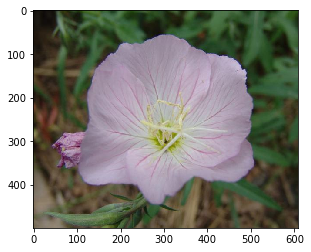

In [6]:
plt.imshow(image)

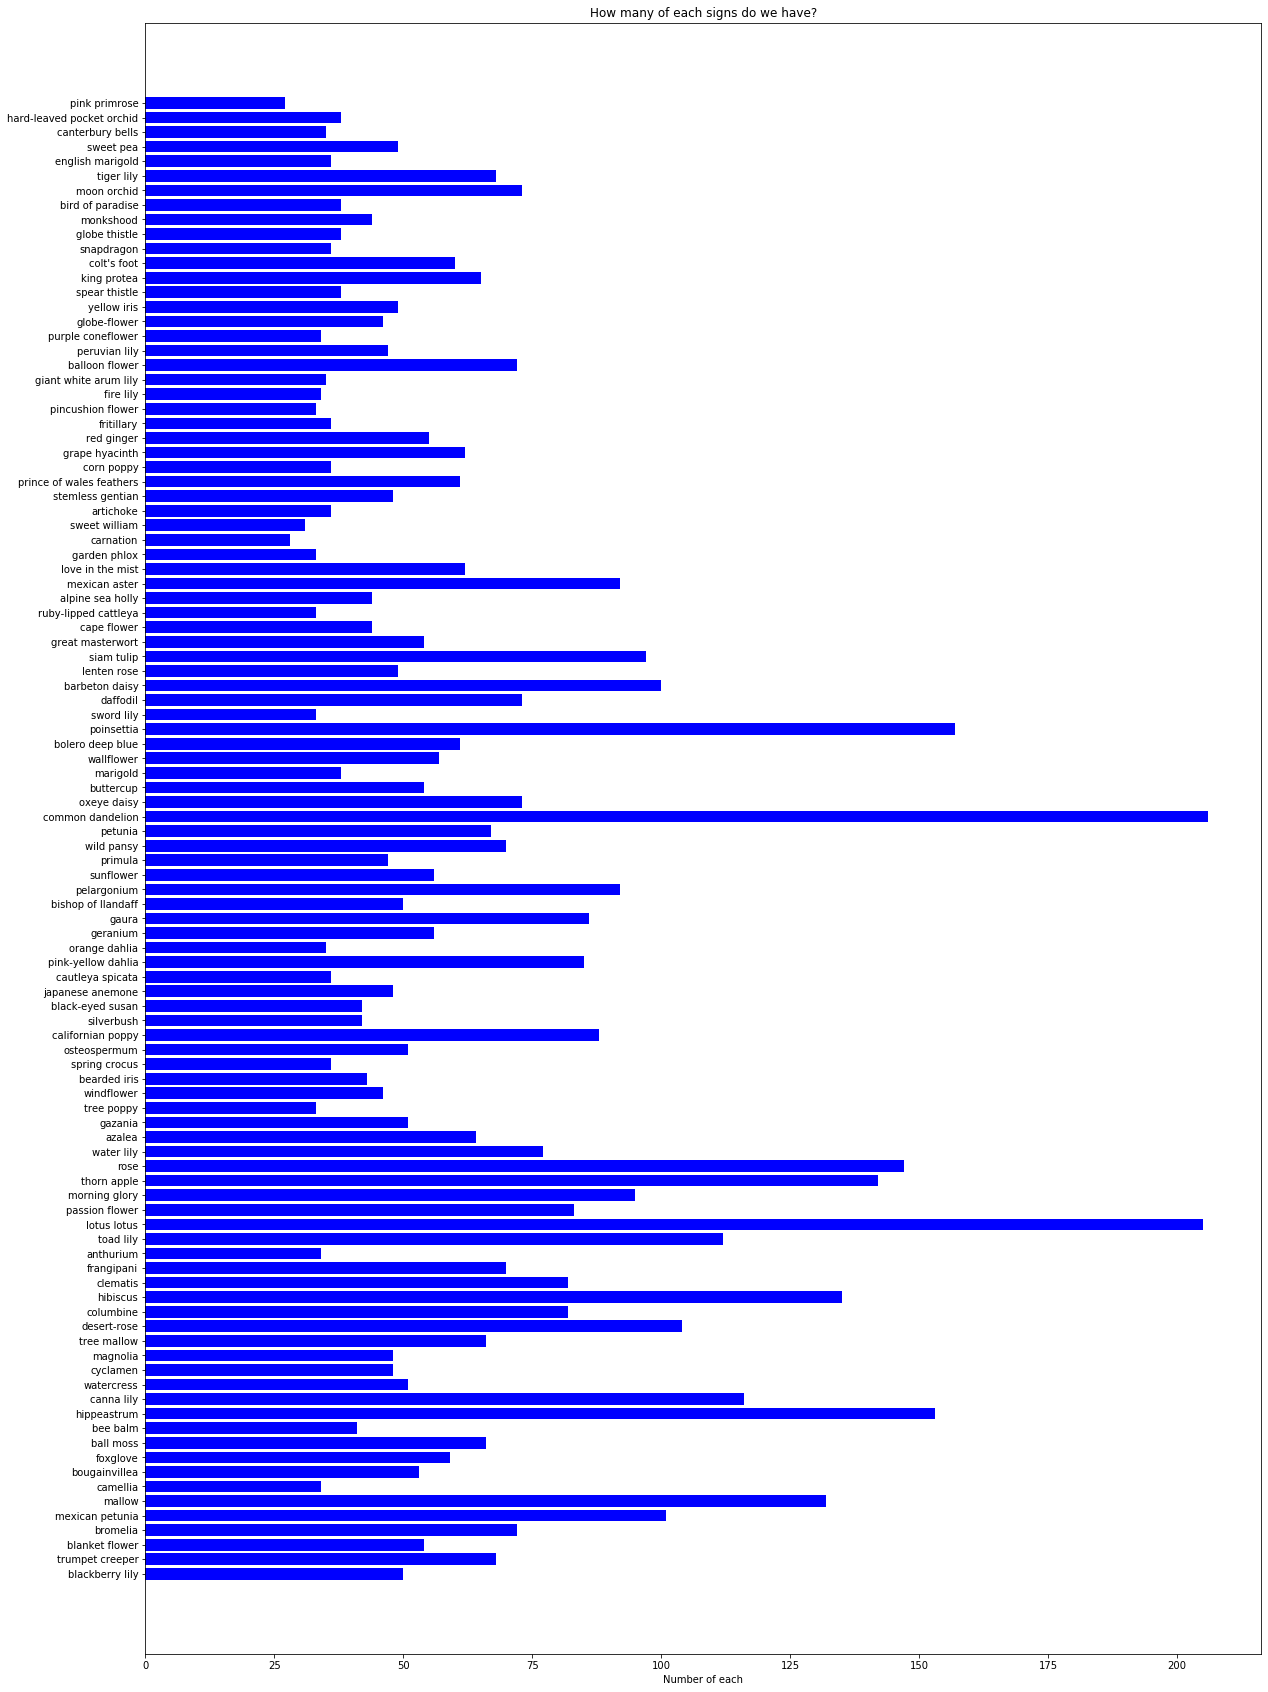

In [7]:
#Show number of images per label
fig, ax = plt.subplots(figsize=(20, 30))

unique, numOfEach = np.unique(train_data.targets, return_counts=True)
ax.barh(labels, numOfEach, align='center', color='blue')
ax.set_yticklabels(all_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of each')
ax.set_title('How many of each signs do we have?')

plt.show()

In [19]:
model = models.densenet121(pretrained=True)
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [8]:
model1 = models.vgg16(pretrained=True)
model1

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /tmp/xdg-cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:29<00:00, 19.1MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
from torch import nn
from torch import optim
import torch.nn.functional as F

# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Freeze parameters so we don't backprop through them
for param in model1.parameters():
    param.requires_grad = False
    
model1.classifier = nn.Sequential(nn.Linear(512*7*7, 4096),
                                  nn.ReLU(True),
                                  nn.Dropout(),
                                  nn.Linear(4096, 1024),
                                  nn.ReLU(True),
                                  nn.Dropout(),
                                  nn.Linear(1024, 102))

criterion = nn.CrossEntropyLoss() # defining loss function


optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

model1.to(device);

cuda


In [10]:
list_trainloss = []
list_trainacc = []
list_validloss =[]
list_validacc = []
list_testloss = []
list_testacc = []
def train_model(model, criterion, optimizer, num_epochs=10):

    since = time.time()
    i=0
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        # model.train(True) or model.train(False) will affect the dropout and batchNorm
        # model.train(False) is equal to model.eval()
        for phase in ['train', 'valid','test']:
            if phase == 'train':
                #scheduler.step()
                model.train(True)
                dataloader=trainloader# Set model to training mode
            elif phase == 'valid':
                model.train(False)
                dataloader=validloader# Set model to evaluate mode
            
            elif phase == 'test':
                model.train(False)
                dataloader = testloader
                
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloader:
                # get the inputs
                inputs, labels = data

                inputs=inputs.to(device)
                labels=labels.to(device)
        
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss  += loss.item()
                running_corrects += torch.sum(preds == labels.data).item()
                
            if phase=="train":
                epoch_loss = running_loss / len(trainloader)
                epoch_acc = running_corrects / len(train_data)
                list_trainloss.append(epoch_loss)
                list_trainacc.append(epoch_acc)
    
                
            elif phase == 'valid':
                epoch_loss = running_loss / len(validloader)
                epoch_acc = running_corrects / len(valid_data)
                list_validloss.append(epoch_loss)
                list_validacc.append(epoch_acc)
            
            elif phase == 'test':
                epoch_loss = running_loss / len(testloader)
                epoch_acc = running_corrects / len(test_data)
                list_testloss.append(epoch_loss)
                list_testacc.append(epoch_acc)

                
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            
#             # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
#                 best_model_wts = model.state_dict()
#                 # saving a checkpoint to use for next time to save time used in training from scratch
#                 state = {'model':model.state_dict(),'optim':optimizer.state_dict()}
#                 torch.save(state,'drive/flowers classification/point_resnet_best.pth')


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

Epoch 1/120
----------
train Loss: 4.4928 Acc: 0.0453
valid Loss: 4.1811 Acc: 0.1479
test Loss: 4.1903 Acc: 0.1455
Epoch 2/120
----------
train Loss: 4.0594 Acc: 0.1345
valid Loss: 3.4023 Acc: 0.2579
test Loss: 3.4249 Acc: 0.2457
Epoch 3/120
----------
train Loss: 3.3897 Acc: 0.2589
valid Loss: 2.4421 Acc: 0.4768
test Loss: 2.4733 Acc: 0.4609
Epoch 4/120
----------
train Loss: 2.7072 Acc: 0.3810
valid Loss: 1.7918 Acc: 0.6015
test Loss: 1.8093 Acc: 0.6222
Epoch 5/120
----------
train Loss: 2.2177 Acc: 0.4660
valid Loss: 1.3695 Acc: 0.6675
test Loss: 1.3779 Acc: 0.6589
Epoch 6/120
----------
train Loss: 1.9235 Acc: 0.5137
valid Loss: 1.1006 Acc: 0.7249
test Loss: 1.1207 Acc: 0.7200
Epoch 7/120
----------
train Loss: 1.6526 Acc: 0.5736
valid Loss: 0.9573 Acc: 0.7653
test Loss: 0.9677 Acc: 0.7641
Epoch 8/120
----------
train Loss: 1.5061 Acc: 0.6007
valid Loss: 0.8102 Acc: 0.8020
test Loss: 0.8437 Acc: 0.7812
Epoch 9/120
----------
train Loss: 1.3520 Acc: 0.6404
valid Loss: 0.7073 Acc: 0.

test Loss: 0.2502 Acc: 0.9389
Epoch 72/120
----------
train Loss: 0.4074 Acc: 0.8871
valid Loss: 0.2217 Acc: 0.9499
test Loss: 0.2683 Acc: 0.9267
Epoch 73/120
----------
train Loss: 0.4016 Acc: 0.8868
valid Loss: 0.2277 Acc: 0.9450
test Loss: 0.2572 Acc: 0.9328
Epoch 74/120
----------
train Loss: 0.3883 Acc: 0.8930
valid Loss: 0.2181 Acc: 0.9450
test Loss: 0.2672 Acc: 0.9279
Epoch 75/120
----------
train Loss: 0.3796 Acc: 0.8924
valid Loss: 0.2385 Acc: 0.9425
test Loss: 0.2741 Acc: 0.9352
Epoch 76/120
----------
train Loss: 0.3626 Acc: 0.8994
valid Loss: 0.2149 Acc: 0.9511
test Loss: 0.2613 Acc: 0.9340
Epoch 77/120
----------
train Loss: 0.3775 Acc: 0.8948
valid Loss: 0.2495 Acc: 0.9425
test Loss: 0.2856 Acc: 0.9218
Epoch 78/120
----------
train Loss: 0.3812 Acc: 0.8941
valid Loss: 0.2403 Acc: 0.9303
test Loss: 0.2683 Acc: 0.9291
Epoch 79/120
----------
train Loss: 0.3770 Acc: 0.8959
valid Loss: 0.2311 Acc: 0.9377
test Loss: 0.2511 Acc: 0.9315
Epoch 80/120
----------
train Loss: 0.3611

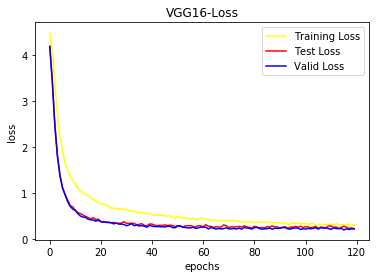

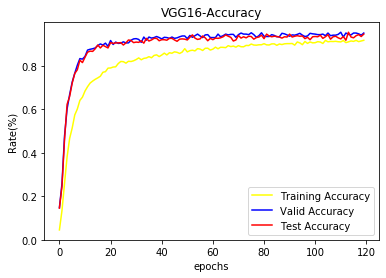

In [11]:
trained_model= train_model(model1, criterion, optimizer,num_epochs=120)

x = [i for i in range(len(list_trainloss))]

ax = plt.gca()

plt.title('VGG16-Loss')
ax.plot(x, list_trainloss,color='yellow', label='Training Loss')
ax.plot(x, list_testloss,color='red', label='Test Loss')
ax.plot(x, list_validloss,color='blue', label='Valid Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# plt.savefig("Loss_Curve_vgg11_120_lr_0.005.png")
plt.show()



x = [i for i in range(len(list_trainloss))]

ax = plt.gca()

plt.title('VGG16-Accuracy')

ax.plot(x, list_trainacc,color='yellow', label='Training Accuracy')

ax.plot(x, list_validacc,color='blue', label='Valid Accuracy')

ax.plot(x, list_testacc,color='red', label='Test Accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Rate(%)')

# plt.savefig("ACC_Curve_vgg12_120_lr_0.005.png")
plt.show()


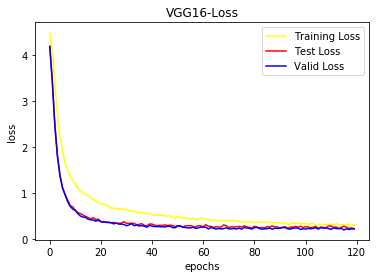

In [12]:
x = [i for i in range(len(list_trainloss))]

ax = plt.gca()

plt.title('VGG16-Loss')
ax.plot(x, list_trainloss,color='yellow', label='Training Loss')
ax.plot(x, list_testloss,color='red', label='Test Loss')
ax.plot(x, list_validloss,color='blue', label='Valid Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.savefig("Loss_Curve_vgg16_120.png")
plt.show()

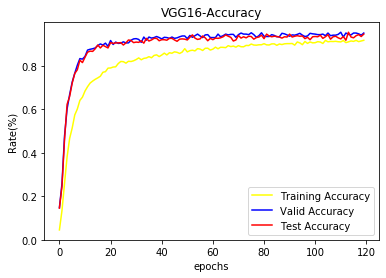

In [13]:
x = [i for i in range(len(list_trainloss))]

ax = plt.gca()

plt.title('VGG16-Accuracy')

ax.plot(x, list_trainacc,color='yellow', label='Training Accuracy')

ax.plot(x, list_validacc,color='blue', label='Valid Accuracy')

ax.plot(x, list_testacc,color='red', label='Test Accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Rate(%)')

plt.savefig("ACC_Curve_vgg16_120.png")
plt.show()

In [14]:
'''
loss = {"train_loss":list_trainloss, "valid_loss":list_validloss, "test_loss":list_testloss}
accuracy = {"train_acc":list_trainacc, "valid_acc":list_validacc, "test_acc":list_testacc}
data_loss = pd.DataFrame(loss)
data_acc = pd.DataFrame(accuracy)
'''

loss_100 = {"train_loss":list_trainloss, "valid_loss":list_validloss, "test_loss":list_testloss}
accuracy_100 = {"train_acc":list_trainacc, "valid_acc":list_validacc, "test_acc":list_testacc}
data_loss_100 = pd.DataFrame(loss_100)
data_acc_100 = pd.DataFrame(accuracy_100)

In [15]:
data_loss_100.to_csv('loss-vgg16-120.csv')

In [16]:
data_acc_100.to_csv("acc-vgg16-120.csv")